In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

This is a test of the galaxia code. All the code here was run on /u/casey_lam/ (sloop, not galley!), then sftp'd to laptop. But can be opened anywhere, because of the wonders of GitHub :) Used the example file for the parameters. 

## Positions from Galaxia

First, we import the positions of the stars (both cartesian and spherical coordinates), and see if they are the same. First, cartesian coordinates.

In [2]:
#load cartesian coordinates from galaxia, galaxy1.ebf. parameters came from default file
xcoord = np.loadtxt("galaxia_px") #kpc, heliocentric
ycoord = np.loadtxt("galaxia_py") #kpc, heliocentric
zcoord = np.loadtxt("galaxia_pz") #kpc, heliocentric

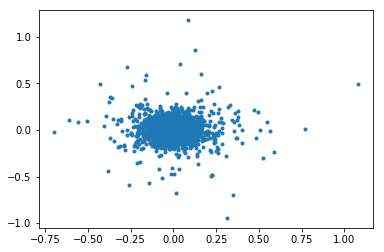

In [3]:
#slice of the x-y plane
plt.plot(xcoord,ycoord,'.')
plt.show()

I am not sure where the cone shape is coming from exactly. It might be from a particular input that was picked in the parameter file, having to do with the survey area. 

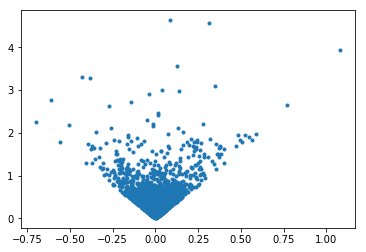

In [4]:
#slice of the x-z plane
plt.plot(xcoord,zcoord,'.')
plt.show()

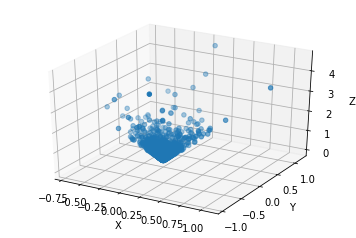

In [5]:
#full 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xcoord, ycoord, zcoord)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Next, we try spherical coordinates.

In [6]:
#load galactic coordinates from galaxia, galaxy1.ebf. parameters came from default file
bcoord=(np.loadtxt("galaxia_glat"))*np.pi/180 #galactic latitude, degrees to radians
lcoord=(np.loadtxt("galaxia_glon"))*np.pi/180 #galactice longitude, degrees to radians
rcoord=np.loadtxt("galaxia_rad") #kpc, radial distance (from where- the sun?)

In [7]:
#convert from spherical to cartesian, for ease of plotting
xconv = rcoord*np.sin(bcoord)*np.cos(lcoord)
yconv = rcoord*np.sin(bcoord)*np.sin(lcoord)
zconv = rcoord*np.cos(bcoord)

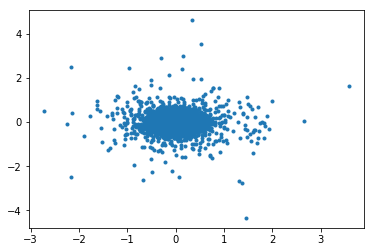

In [8]:
#slice of the x-y plane
plt.plot(xconv,yconv,'.')
plt.show()

We get a similar cone-ish shape as before, but now it's spread out a lot more.

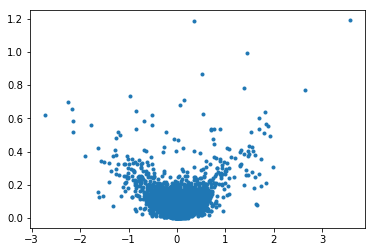

In [9]:
#slice of the x-z plane
plt.plot(xconv,zconv,'.')
plt.show()

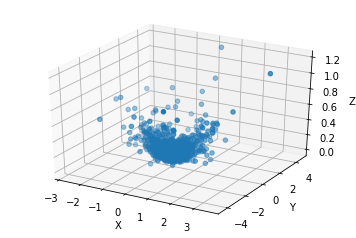

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xconv, yconv, zconv)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Investigating further, it appears that something weird is going on with the coordinate b (the latitude). In the code below, you can change the number 'i' for the input. The difference in the radius squared is always very small, so that seems to make sense. The difference in the longitude coordinate is also very small, or either -3.14 or -6.28, which is just an issue with the definition of arctangent. However, the difference in the latitude coordinate is always something that's pretty big, and I'm not sure what to make of that.

In [11]:
i = 12

#difference of the radius squared, between cartesian and spherical data
print(xcoord[i]**2 + ycoord[i]**2 + zcoord[i]**2 - rcoord[i]**2)

#difference of the longitude coordinate, between the cartesian and spherical data
print(np.arctan(ycoord[i]/xcoord[i]) - lcoord[i])

#difference of the latitude coordinate, between the cartesian and spherical data
print(np.arccos(zcoord[i]/np.sqrt(xcoord[i]**2 + ycoord[i]**2 + zcoord[i]**2)) - bcoord[i])

-5.62479379046e-10
-1.21529468156e-07
-1.00199958381


## Velocities from Galaxia

Since we care about proper motion, which is movement along the celestial sphere, we need the velocities in spherical coordinates. The galaxia output only gives it in cartesian, so we convert. 

In [12]:
#load cartesian velocities from galaxia, galaxy1.ebf. parameters came from default file
xvel = np.loadtxt("galaxia_vx") #km/s, heliocentric
yvel = np.loadtxt("galaxia_vy") #km/s, heliocentric
zvel= np.loadtxt("galaxia_vz") #km/s, heliocentric

In [13]:
#calculate velocities in spherical coordinates
r2 = np.multiply(xcoord,xcoord) + np.multiply(ycoord,ycoord) + np.multiply(zcoord,zcoord) #r^2
dr = (np.multiply(xcoord,xvel) + np.multiply(xcoord,xvel) + np.multiply(xcoord,xvel))/np.sqrt(r2) #\dot{r}
dtheta = (np.multiply(yvel,xcoord) - np.multiply(ycoord,xvel))/(np.multiply(xcoord,xcoord) + np.multiply(ycoord,ycoord)) #\dot{\theta}
dphi = (np.multiply(zvel,np.sqrt(r2)) - np.multiply(zcoord, dr))/r2 #\dot{\phi}

In [14]:
#just to make sure i know what multiply and sqrt are doing...
a1 = [1,2]
b1 = [3,4]
c1 = [5,6]
test = np.multiply(a1,a1) + np.multiply(b1,b1) + np.multiply(c1,c1)
print(np.sqrt(test))

[ 5.91607978  7.48331477]
